# Analysis 2

In [1]:
import argparse
import json
import pprint
import requests
import sys
import urllib
import csv
import time
import datetime
import pandas as pd
import glob
from pandas.io.json import json_normalize
from numpy import nan as NA

from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode

In [2]:
CLIENT_ID = 'gBcvfFpabk3CnzmXKdYe3w'
CLIENT_SECRET = 'K9dIltpo1DH4hTrKy6c7YhxR2bwENElpzqTEaRz44QXxKnImd3cSOnYmhrucVHns'
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.
TOKEN_PATH = '/oauth2/token'
GRANT_TYPE = 'client_credentials'
SEARCH_LIMIT = 50

In [3]:
def obtaintoken(host, path):
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    assert CLIENT_ID, "Please supply your client_id."
    assert CLIENT_SECRET, "Please supply your client_secret."
    data = urlencode({
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
        'grant_type': GRANT_TYPE,
    })
    headers = {
        'content-type': 'application/x-www-form-urlencoded',
    }
    response = requests.request('POST', url, data=data, headers=headers)
    token = response.json()['access_token']
    return token

token = obtaintoken(API_HOST, TOKEN_PATH)
token


'Z1C_ixTGccfADwGnwzG5yUE_tqYbJ3Vfj33NrA5Qi_LhXdj_A0idBPo8mP2dHU71s6HAkJuCJDxhH-BJ1WSDno-pyfmit-GNuVB8gPlu2kxjw-tgGZSO6VHnG4H_WHYx'

In [4]:
def request(host, path, token, url_params=None):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % token,
    }

#     pr\int(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

def search(token, term, location):
    

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, token, url_params=url_params)

def get_business(token, business_id):
    
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, token)

def query_api(term, location):
   

    response = search(token, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(token, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)


In [5]:
def findresult(place):
 
    page = 0
    url_params = {
#                 'term': 'launch',
                'location': place,
                'limit': SEARCH_LIMIT,
                'offset':0
            }
    response1 = request(API_HOST, SEARCH_PATH, token, url_params=url_params)
    with open('data/consumptionlevel/'+ place.split(',')[0] + str(page) +'.json', 'a') as outfile:
        json.dump(response1, outfile)

    while (page < 19):
#    due to the limitation of 1000
        page = page + 1
        url_params = {
#                 'term': 'launch',
                'location': place,
                'limit': SEARCH_LIMIT,
                'offset':50*page

            }

        response = request(API_HOST, SEARCH_PATH, token, url_params=url_params)
        with open('data/consumptionlevel/'+ place.split(',')[0] + str(page) +'.json', 'a') as outfile:
            json.dump(response, outfile)

In [6]:
place = 'Boston, MA'
findresult(place)

In [7]:
place = 'New York, NY'
findresult(place)
place = 'Seattle, WA'
findresult(place)
place = 'Dallas, TX'
findresult(place)
place = 'Denver, CO'
findresult(place)

In [12]:
pathList = []
for filepath in glob.glob('/Users/xiongyiming/Documents/INFO7374Python/Final Project/data/consumptionlevel/*.json'):
    pathList.append(filepath)    


In [13]:
dfbo=pd.DataFrame()
dfny=pd.DataFrame()
dfse=pd.DataFrame()
dfda=pd.DataFrame()
dfde=pd.DataFrame()
for file in pathList:
    if 'Boston' in file:
        
        with open(file) as data_file:    
            datajson = json.load(data_file)
            if 'businesses' in datajson:
                df1 = json_normalize(datajson['businesses'])
                df1 = df1.reindex(columns=['name', 'price', 'rating', 'review_count'])
                df2 = df1[['name', 'price', 'rating', 'review_count']]
                dfbo = pd.concat([dfbo,df2])
                
    if 'New York' in file:
        with open(file) as data_file:    
            datajson = json.load(data_file)
            if 'businesses' in datajson:
                df1 = json_normalize(datajson['businesses'])
                df1 = df1.reindex(columns=['name', 'price', 'rating', 'review_count'])
                df2 = df1[['name', 'price', 'rating', 'review_count']]
                dfny = pd.concat([dfny,df2])
                
    if 'Seattle' in file:
        with open(file) as data_file:    
            datajson = json.load(data_file)
            if 'businesses' in datajson:
                df1 = json_normalize(datajson['businesses'])
                df1 = df1.reindex(columns=['name', 'price', 'rating', 'review_count'])
                df2 = df1[['name', 'price', 'rating', 'review_count']]
                dfse = pd.concat([dfse,df2])
                
    if 'Dallas' in file:
        with open(file) as data_file:    
            datajson = json.load(data_file)
            if 'businesses' in datajson:
                df1 = json_normalize(datajson['businesses'])
                df1 = df1.reindex(columns=['name', 'price', 'rating', 'review_count'])
                df2 = df1[['name', 'price', 'rating', 'review_count']]
                dfda = pd.concat([dfda,df2])
                
                
    if 'Denver' in file:
        with open(file) as data_file:    
            datajson = json.load(data_file)
            if 'businesses' in datajson:
                df1 = json_normalize(datajson['businesses'])
                df1 = df1.reindex(columns=['name', 'price', 'rating', 'review_count'])
                df2 = df1[['name', 'price', 'rating', 'review_count']]
                dfde = pd.concat([dfde,df2])

In [19]:
citylist = [dfbo,dfny,dfse, dfda, dfde]
def replace(df):
    df['price'].replace(['$'], '1',inplace=True)
    df['price'].replace(['$$'],'2',inplace=True)
    df['price'].replace(['$$$'], '3',inplace=True)
    df['price'].replace(['$$$$'],'4',inplace=True)
    df1 = df.dropna()
    df1.head()
    print(len(df1))
    return df1

dfbo1 = replace(dfbo)
dfny1 = replace(dfny)
dfse1 = replace(dfse)
dfda1 = replace(dfda)
dfde1 = replace(dfde)


dfbo1.head()

938
947
960
970
984


,name,price,rating,review_count
0,Polcari's Coffee,1,5.0,150
1,GrandTen Distilling,2,5.0,69
3,Piperi Mediterranean Grill,1,4.5,404
4,O Ya,4,4.5,569
6,Boston Brewin Coffee,1,4.5,128


In [ ]:
dfbo1['consumptionlevel'] = dfbo1['price'] * dfbo1['rating']


In [31]:
def calculateconsumptionlevel(df):
    df['consumptionlevel'] = df['price'].astype(float) * df['rating'].astype(float) * df['review_count'].astype(float)* 0.01

In [35]:
calculateconsumptionlevel(dfbo1)
calculateconsumptionlevel(dfny1)
calculateconsumptionlevel(dfse1)
calculateconsumptionlevel(dfda1)
calculateconsumptionlevel(dfde1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
dfbo1['region'] = 'Boston'
dfny1['region'] = 'NewYork'
dfse1['region'] = 'Seattle'
dfda1['region'] = 'Dallas'
dfde1['region'] = 'Denver'

dfbo1.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,name,price,rating,review_count,consumptionlevel,region
0,Polcari's Coffee,1,5.0,150,7.50,Boston
1,GrandTen Distilling,2,5.0,69,6.90,Boston
3,Piperi Mediterranean Grill,1,4.5,404,18.18,Boston
4,O Ya,4,4.5,569,102.42,Boston
6,Boston Brewin Coffee,1,4.5,128,5.76,Boston


In [53]:
df = pd.concat([dfbo1,dfny1,dfse1, dfda1, dfde1])
df.head()

,name,price,rating,review_count,consumptionlevel,region
0,Polcari's Coffee,1,5.0,150,7.50,Boston
1,GrandTen Distilling,2,5.0,69,6.90,Boston
3,Piperi Mediterranean Grill,1,4.5,404,18.18,Boston
4,O Ya,4,4.5,569,102.42,Boston
6,Boston Brewin Coffee,1,4.5,128,5.76,Boston


In [64]:
df1 = pd.DataFrame(df.groupby(['region'], as_index=False).mean())

# df1.set_index('region')
df1

,region,rating,review_count,consumptionlevel
0,Boston,3.871002,266.069296,21.324366
1,Dallas,4.013402,199.089691,14.868789
2,Denver,4.076728,215.739837,16.210701
3,NewYork,4.319958,440.447730,39.825913
4,Seattle,4.178125,330.570833,25.023495


In [72]:
df2 = df1.set_index(['region'])
df2

,rating,review_count,consumptionlevel
region,,,
Boston,3.871002,266.069296,21.324366
Dallas,4.013402,199.089691,14.868789
Denver,4.076728,215.739837,16.210701
NewYork,4.319958,440.447730,39.825913
Seattle,4.178125,330.570833,25.023495


In [42]:
df1.to_csv('consumptionlevel.csv')

In [76]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# sns.boxplot(data=df2['rating'])

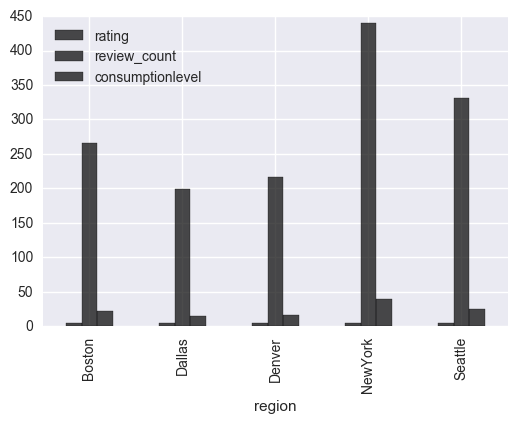

In [74]:

df2.plot(kind='bar', color='k', alpha=0.7) 